In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/placement - Sheet1.csv')

In [3]:
df.head() #gives the starting 5 rows of data with header

,Serial no,cgpa,iq,placement
0,1,5.5,152,0
1,2,6.3,148,1
2,3,9.7,136,1
3,4,8.4,105,1
4,5,9.3,194,1


In [4]:
df.shape #tells about row and column of data

(100, 4)

In [5]:
df=df.iloc[:,1:]

In [ ]:
# steps

# 1.Preprocess+EDA(exploratory data analysis)+Feature selection
# 2.Extract input and output column
# 3.Scale the values
# 4.Train test split
# 5.Train the model
# 6.Evaluate the model/model selection
# 7.Deploy the model

In [6]:
df.head()

,cgpa,iq,placement
0,5.5,152,0
1,6.3,148,1
2,9.7,136,1
3,8.4,105,1
4,9.3,194,1


In [7]:
import matplotlib.pyplot as plt


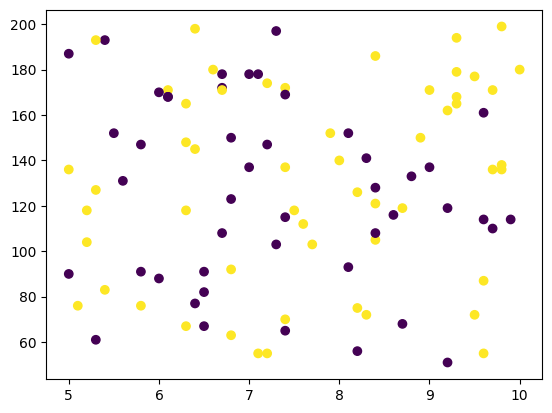

In [9]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement']) #plot the points as a graph but scattered points and c colors it

In [10]:
X = df.iloc[:,0:2]  #takes first two columns and all rows
Y = df.iloc[:,-1]

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1) #this function takes 10% of the data as test data and other will be used for training and stores in 4 variables

In [13]:
X_train #shows training data

,cgpa,iq
15,6.4,77
47,7.7,103
14,8.1,152
69,9.7,171
30,7.3,197
...,...,...
59,6.3,118
57,5.1,76
51,6.0,170
81,5.6,131


In [14]:
#scaling of the values
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [15]:
X_train = scaler.fit_transform(X_train) #scales and fit into criteria by transforming

In [16]:
X_test = scaler.fit_transform(X_test)

In [22]:
X_train

array([[-0.70777403, -1.230518  ],
       [ 0.18746447, -0.61248578],
       [ 0.46292247,  0.55226725],
       [ 1.56475447,  1.00390618],
       [-0.08799353,  1.6219384 ],
       [-0.01912903,  0.95636524],
       [ 0.53178697, -1.27805894],
       [-0.01912903, -1.39691129],
       [-0.98323203, -0.96904283],
       [ 0.32519347,  0.55226725],
       [-0.63890953, -1.4682227 ],
       [ 1.63361897,  0.17193973],
       [-0.22572253,  1.17029947],
       [ 0.66951597, -0.01822403],
       [ 1.56475447, -0.44609249],
       [ 0.94497397,  0.10062832],
       [-0.01912903,  0.1957102 ],
       [-0.15685803,  1.07521759],
       [ 1.28929647,  1.55062699],
       [ 0.80724497, -0.30346967],
       [-0.57004503,  1.21784041],
       [-0.91436753,  0.93259477],
       [ 1.28929647,  0.93259477],
       [ 1.70248347, -0.35101061],
       [-1.53414803, -0.25592873],
       [-0.15685803,  0.4334149 ],
       [-0.77663853,  0.86128336],
       [-0.77663853,  0.45718537],
       [ 1.49588997,

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
clf=LogisticRegression()   #creates and object of logistic regression

In [21]:
#model training , fit function is used for that
clf.fit(X_train,Y_train)

LogisticRegression()

In [25]:
y_pred=clf.predict(X_test) #predicts the data (output)

In [24]:
Y_test

52    1
26    0
31    1
98    1
71    0
27    0
93    1
24    1
58    1
34    0
Name: placement, dtype: int64

In [26]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(Y_test,y_pred)  #checks the accuracy score

0.4

In [30]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

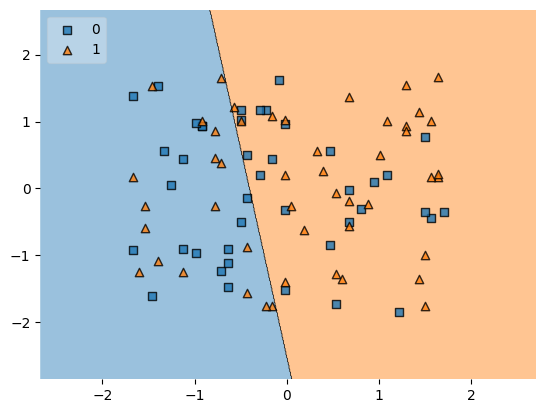

In [32]:
plot_decision_regions(X_train,Y_train.values,clf=clf,legend=2) #plot the decision making point and Y_train has .values because it is not scaled

In [34]:
import pickle #converts every object into a file

In [35]:
pickle.dump(clf,open('model.pkl','wb')) #converts to file and save as model.pkl and pens in write binary mode